In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn import linear_model
from sklearn import preprocessing


In [2]:
df = pd.read_csv('Melbourne housing.csv')
df = df.drop_duplicates()
#df = df.dropna()
print(df.head())
print(df.shape)

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode      ...       Bathroom  Car  Landsize  \
0   3/9/2016       2.5    3067.0      ...            1.0  1.0     126.0   
1  3/12/2016       2.5    3067.0      ...            1.0  1.0     202.0   
2   4/2/2016       2.5    3067.0      ...            1.0  0.0     156.0   
3   4/2/2016       2.5    3067.0      ...            2.0  1.0       0.0   
4   4/3/2017       2.5    3067.0      ...            2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea Lattitude  Longtitude  \
0           NaN        NaN

In [3]:
#checking the type for each column.  Can also use series.dtype, on individual columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34856 non-null object
Address          34856 non-null object
Rooms            34856 non-null int64
Type             34856 non-null object
Price            27247 non-null float64
Method           34856 non-null object
SellerG          34856 non-null object
Date             34856 non-null object
Distance         34855 non-null float64
Postcode         34855 non-null float64
Bedroom2         26639 non-null float64
Bathroom         26630 non-null float64
Car              26128 non-null float64
Landsize         23046 non-null float64
BuildingArea     13741 non-null float64
YearBuilt        15550 non-null float64
CouncilArea      34853 non-null object
Lattitude        26880 non-null float64
Longtitude       26880 non-null float64
Regionname       34853 non-null object
Propertycount    34853 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.9+ M

In [4]:
#splitting the data

#dropping unnecessary columns
pre_X = df.drop(['Price', 'Address', 'Lattitude', 'Longtitude', 'CouncilArea', 'Method', 'SellerG', 'Date', 'Distance', 
                 'Propertycount'], 1)

#getting dummy values for categorical data, and creating dataframe of the independent (predictor) values
X_df = pd.get_dummies(pre_X, columns=['Suburb', 'Regionname'])


#print(X_df.head())
print(X_df.shape)

(34856, 368)


In [5]:
#creating a new feature by Recoding the year built column to reflect and compare the age of the houses.
X_df['PropertyAge'] = 2019 - X_df['YearBuilt']

#Recoding our Type column from a categorcial to a numeric column.
X_df['Type'] = X_df['Type'].map({'h':1, 'u':2, 't':3})


In [6]:
#checking for null values
X_df.isnull().sum()

Rooms                                        0
Type                                         0
Postcode                                     1
Bedroom2                                  8217
Bathroom                                  8226
Car                                       8728
Landsize                                 11810
BuildingArea                             21115
YearBuilt                                19306
Suburb_Abbotsford                            0
Suburb_Aberfeldie                            0
Suburb_Airport West                          0
Suburb_Albanvale                             0
Suburb_Albert Park                           0
Suburb_Albion                                0
Suburb_Alphington                            0
Suburb_Altona                                0
Suburb_Altona Meadows                        0
Suburb_Altona North                          0
Suburb_Ardeer                                0
Suburb_Armadale                              0
Suburb_Ascot 

In [7]:
#taking care of missing data

#fixing missing data in Bedroom2 column
X_df['Bedroom2'].ffill(axis=0, inplace=True)
print('Null values in Bedroom2 column: ', X_df['Bedroom2'].isnull().sum())

#fixing missing data in Bathroom column
X_df['Bathroom'].ffill(axis=0, inplace=True)
print('Null values in Bathroom column: ', X_df['Bathroom'].isnull().sum())

#fixing missing data in Car column
X_df['Car'].ffill(axis=0, inplace=True)
print('Null values in Car column: ', X_df['Car'].isnull().sum())


#fixing missing data in postcode column
X_df['Postcode'].ffill(axis=0, inplace=True)
print('Null values in Postcode column: ', X_df['Postcode'].isnull().sum())

#fixing missing data in YearBuilt column
X_df['YearBuilt'].bfill(axis=0, inplace=True)
print('Null values in YearBuilt column: ', X_df['YearBuilt'].isnull().sum())

#fixing missing data in PropertyAge column
X_df['PropertyAge'].bfill(axis=0, inplace=True)
print('Null values in PropertyAge column: ', X_df['PropertyAge'].isnull().sum())


#fixing missing data in Landsize and BuildingArea columns
X_df['Landsize'].fillna(np.mean(X_df['Landsize']), inplace=True)
X_df['BuildingArea'].fillna(np.mean(X_df['BuildingArea']), inplace=True)

Null values in Bedroom2 column:  0
Null values in Bathroom column:  0
Null values in Car column:  0
Null values in Postcode column:  0
Null values in YearBuilt column:  0
Null values in PropertyAge column:  0


In [8]:
df_null_values = X_df.isnull().sum().sum()

print('Total Null values in the independent variables after fixing the missing data: ', df_null_values)

Total Null values in the independent variables after fixing the missing data:  0


In [9]:
#checking null values in dependent variable
null_Y = df['Price'].isnull().sum()

print('Number of null values in dependent variable: ', null_Y)

Number of null values in dependent variable:  7609


In [10]:
#fixing null values in dependent variable, Y
df['Price'].bfill(axis=0, inplace=True)
print('Null values in dependent variable: ', X_df['YearBuilt'].isnull().sum())

Null values in dependent variable:  0


In [11]:
#assigning our dependent variable
Y = df['Price']

In [12]:
#initial set of train and test groups, before applying SelectKBest and PCA.

train_X, test_X, train_Y, test_Y = train_test_split(X_df, Y, test_size=.3, random_state=10)

#checking to see where the nan values are.  Note: I used sum because array was too large to view every observation.
#0 implies false, 1 implies true
print(np.isnan(train_Y).any())
print(np.isnan(train_X).any().sum())
print(np.isnan(test_Y).any())
print(np.isnan(test_X).any().sum())

#correcting for nans
#np.nan_to_num(train_Y)
#np.nan_to_num(test_Y)


False
0
False
0


# Simple Random Forest Model:

In [13]:
#initializing the first simple model, before preprocessing our data

#set start time
start_time_rforest = datetime.datetime.now()

#initialize and fit the the first random forest regression model using full data.
forest_regr = ensemble.RandomForestRegressor()
forest_regr.fit(train_X, train_Y)

# Classify, storing the result in a new variable.
#y_pred_rforest = forest_regr.predict(test_X)

#get accuracy score from our model
print('R squared for Random Forest regression Model: ', forest_regr.score(test_X, test_Y))

#calculate end time
end_time_rforest = datetime.datetime.now()

#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(forest_regr, X_df, Y, cv=10)
print(rforest_cvs)
print('Average cross validated R squared from our Random Forest Model is: ' + str(np.mean(rforest_cvs)))

C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R squared for Random Forest regression Model:  0.4198169393809853
[0.32525776 0.35450436 0.33862064 0.36638644 0.40687279 0.47963115
 0.39900003 0.46396365 0.36262014 0.38288382]
Average cross validated R squared from our Random Forest Model is: 0.387974077634997


                 Rooms  Postcode  Bedroom2  Bathroom       Car  Landsize  \
Rooms         1.000000  0.085890  0.946755  0.611875  0.393880  0.037402   
Postcode      0.085890  1.000000  0.089292  0.120079  0.067885  0.040665   
Bedroom2      0.946755  0.089292  1.000000  0.614940  0.388492  0.037019   
Bathroom      0.611875  0.120079  0.614940  1.000000  0.307520  0.036341   
Car           0.393880  0.067885  0.388492  0.307520  1.000000  0.037830   
Landsize      0.037402  0.040665  0.037019  0.036341  0.037830  1.000000   
BuildingArea  0.156231  0.042436  0.154159  0.147554  0.104371  0.354532   
YearBuilt    -0.012743  0.089800 -0.002017  0.167869  0.128688  0.044484   

              BuildingArea  YearBuilt  
Rooms             0.156231  -0.012743  
Postcode          0.042436   0.089800  
Bedroom2          0.154159  -0.002017  
Bathroom          0.147554   0.167869  
Car               0.104371   0.128688  
Landsize          0.354532   0.044484  
BuildingArea      1.000000   0.0677

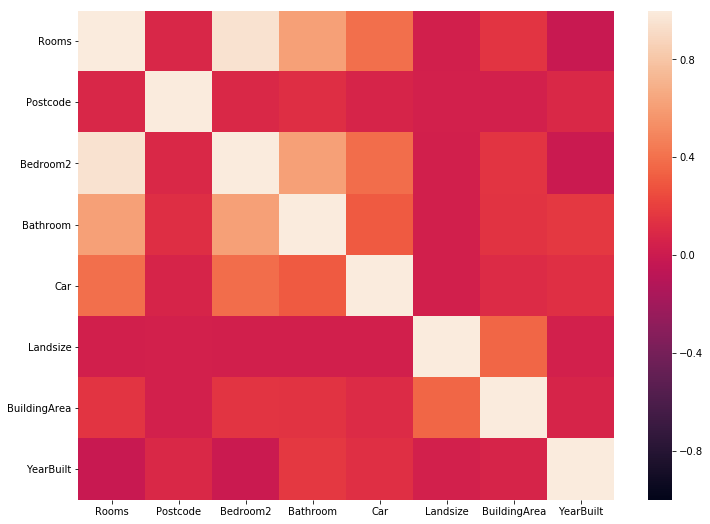

In [14]:
#correlation matrix
print(pre_X.corr())

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

#Creating a heatmap to check for any correlation between our independent variables
Xvar_heatmap = sns.heatmap(pre_X.corr(), vmin=-1, vmax=1)

print(Xvar_heatmap)

Text(0.5, 1.0, 'BuildingArea Vs. Price')

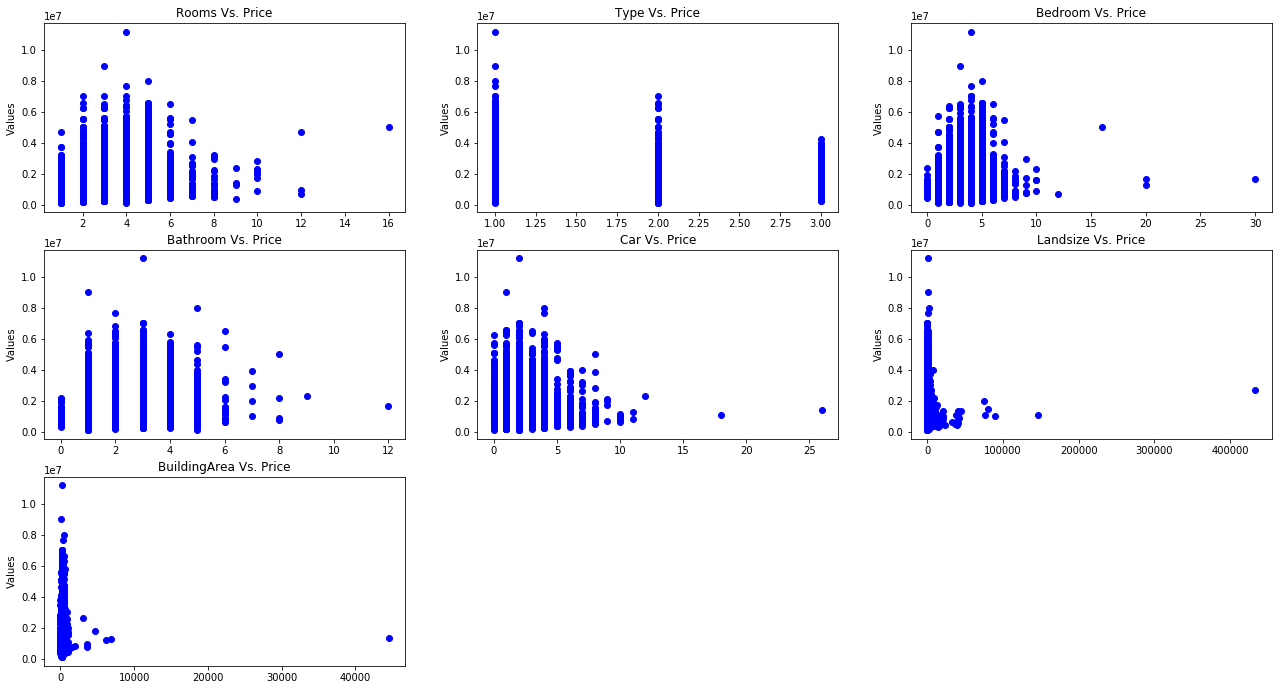

In [17]:
#plotting the relationship between the independent and dependent variables, as well as the histograpsh of independent variables.

#setting the overall size of the plot figure
plt.figure(figsize=(22, 16))

#making a plot figure that will have four rows with three plots in each row
plt.subplot(4, 3, 1)
plt.scatter(x = X_df['Rooms'], y = df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Rooms Vs. Price')

plt.subplot(4, 3, 2)
plt.scatter(x = X_df['Type'], y = df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Type Vs. Price')

plt.subplot(4, 3, 3)
plt.scatter(x = X_df['Bedroom2'], y = df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Bedroom Vs. Price')

plt.subplot(4, 3, 4)
plt.scatter(x = X_df['Bathroom'], y = df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Bathroom Vs. Price')

plt.subplot(4, 3, 5)
plt.scatter(x = X_df['Car'], y = df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Car Vs. Price')

plt.subplot(4, 3, 6)
plt.scatter(x = X_df['Landsize'], y = df['Price'], color='blue')
plt.ylabel('Values')
plt.title('Landsize Vs. Price')

plt.subplot(4, 3, 7)
plt.scatter(x = X_df['BuildingArea'], y = df['Price'], color='blue')
plt.ylabel('Values')
plt.title('BuildingArea Vs. Price')


#plt.hist(new_df['ClumpThickness'], color='green')
#plt.axvline(new_df['ClumpThickness'].mean(), color='b', linestyle='solid', linewidth=2)
#plt.axvline(new_df['ClumpThickness'].mean() + new_df['ClumpThickness'].std(), color='b', linestyle='dashed', linewidth=2)
#plt.axvline(new_df['ClumpThickness'].mean()- new_df['ClumpThickness'].std(), color='b', linestyle='dashed', linewidth=2) 
#plt.ylabel('values')
#plt.title('ClumpThickness')

#plt.tight_layout()
#plt.show()

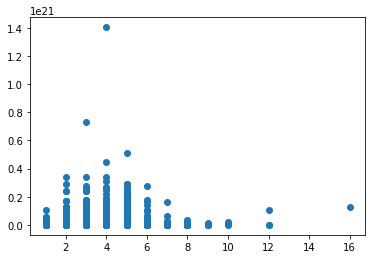

In [24]:
#the relationship between the outcome dependent and many of the independent variables are non-linear.  To capture this
#non-linearity I will square these variables to create new features.

#X_df['RoomSquared'] = X_df['Rooms'] * X_df['Rooms'] * X_df['Rooms']

df['Price'] = np.sqrt(df['Price'])

plt.scatter(x=X_df['Rooms'], y=df['Price'])
plt.show()

#### The basic random forest model with the full data, without any preprocessing, gave us a weak R squared value of 39%.  Next I will apply PCA, in the hopes of improving the R squared value. 

# PCA

In [26]:
# Normalize the data so that all variables have a mean of 0 and standard deviation
# o

X_scaled = StandardScaler().fit_transform(X_df)

C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sajee\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
#Apply PCA

pca = PCA(.95)
X_pca = pca.fit_transform(X_scaled)

comp_no = pca.n_components_
comp_var_ratio = pca.explained_variance_ratio_

print(comp_no)
#print(comp_var_ratio)
#print(p_components)

337


In [28]:
#pca data to dataframe
pca_df = pd.DataFrame(data=X_pca)
print(pca_df.head())
print(pca_df.shape)

        0         1         2         3         4         5         6    \
0 -2.918284 -0.339345  0.299024  2.780353  0.873018  0.272796 -0.232105   
1 -2.917275 -0.338995  0.297961  2.780296  0.873688  0.274538 -0.231212   
2 -3.200138 -0.310450  0.285087  2.778757  0.832296  0.258316 -0.306940   
3 -1.493774 -0.390121  0.596213  2.954827  0.778424  0.264699 -0.018124   
4 -1.460233 -0.465501  0.699035  3.206804  0.942475  0.338863 -0.126084   

        7         8         9      ...          327       328       329  \
0  0.036423  0.997038 -0.233397    ...     0.004093  0.002281 -0.001788   
1  0.036271  0.997908 -0.226288    ...     0.004093  0.002281 -0.001788   
2  0.027095  1.108077 -0.394435    ...     0.004102  0.002299 -0.001775   
3 -0.009409  0.386263 -0.064646    ...     0.004050  0.002492 -0.001849   
4  0.023666  0.651636 -0.291212    ...     0.004138  0.002411 -0.001812   

        330       331       332       333       334       335       336  
0  0.000204  0.021198  0

In [29]:
#After applying PCA, I split the data into a second set of train and test groups

train_X_pca, test_X_pca, train_Y_pca, test_Y_pca = train_test_split(X_pca, Y, test_size=.3, random_state=20)

In [37]:
#initializing and fitting the ridge regression model, after pca

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(train_X, train_Y)
print('R squared: ', ridgeregr.score(test_X, test_Y))
params = ridgeregr.coef_
print(params)

ridgeregr_cvs = cross_val_score(ridgeregr, X_df, Y, cv=10)


R squared:  0.3981589338477668
[ 2.25080694e+05 -1.47304897e+05 -4.66733848e+02 -3.60648987e+04
  7.78603445e+04  2.85805842e+04  3.65887997e+00  3.77782948e+02
  8.13192674e+02  2.09525233e+05  4.36938876e+05  5.85639425e+04
 -3.06518378e+04  4.78599199e+05 -3.22580802e+04  3.41507139e+05
  1.39967503e+05 -9.04508112e+04  7.96930218e+03 -9.37284497e+04
  2.93891560e+05  2.68967534e+05  1.37723960e+05 -2.14901650e+05
  1.72360249e+05 -1.49964618e+04 -1.51752226e+05  4.04727903e+04
  2.19552131e+04 -8.71588288e+03 -1.30254666e+05  3.66357489e+05
  2.25627590e+05 -1.19297578e+05  2.12400755e+04  1.55901530e+05
 -1.00690711e+04  4.39109234e+04  1.44006151e+05 -3.58225644e+04
 -4.00439270e+04 -2.08399453e+05  7.08959838e+04  5.02482839e+04
  2.21507517e+05  7.80259206e+04 -1.46765292e+04  9.49101512e+04
 -1.29467374e+05  0.00000000e+00  3.29081321e+05 -7.31505208e+03
  7.71622254e+02  5.08606762e+05  1.10859140e+05 -3.19705500e+05
 -3.33847505e+04  5.92713185e+04  1.48818773e+05  1.5754873

In [ ]:
# perform grid search to find the optimal parameters for our random forest model, using the PCA dataset.
rforest = ensemble.RandomForestRegressor(random_state=20)
forest_param_grid = {'n_estimators':[50,100,200,300], 'max_depth':[2,4,6,8], 'min_samples_split':[5,10,15,20], 
                     'max_features':[2,4,6,8,10], 'criterion':['mse', 'mae']}
rforest_grid = GridSearchCV(rforest, forest_param_grid, cv=10, verbose=3)
#rforest_grid.fit(train_X_pca, train_Y_pca)
print('Best parameters for decision tree:', rforest_grid.best_params_)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50, score=0.13647676217872606, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50, score=0.13912917769737776, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50, score=0.13187684774208863, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50, score=0.12913513221677253, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50, score=0.11997945783305297, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50, score=0.1363814688579993, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=5, n_estimators=50, score=0.11825353065099965, total=   0.2s
[CV] cri

[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50, score=0.13647676217872606, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50, score=0.13912917769737776, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50, score=0.13187684774208863, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50, score=0.12913513221677253, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=50, score=0.11997945783305297, total=   0.2

[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=300, score=0.1499990577814535, total=   1.7s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=10, n_estimators=300, score=0.15457106109822039, total=   1.7s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=50, score=0.13647676217872606, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=50, score=0.13912917769737776, total=   0.2s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=50, score=0.13187684774208863, total=   0

[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=300, score=0.12773941659082744, total=   1.7s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=300, score=0.14616424816048124, total=   1.7s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=300, score=0.1499990577814535, total=   1.7s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=15, n_estimators=300, score=0.15457106109822039, total=   1.7s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=50, score=0.13647676217872606, total=

[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300, score=0.12873770810457075, total=   1.7s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300, score=0.14301411937742026, total=   1.6s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300, score=0.12773941659082744, total=   1.6s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300, score=0.14616424816048124, total=   1.7s
[CV] criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=2, min_samples_split=20, n_estimators=300, score=0.1499990577814535, tota

[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300, score=0.17015800704675332, total=   3.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300, score=0.16670721096527452, total=   3.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300, score=0.1560849756785494, total=   2.9s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300, score=0.1711222751739948, total=   2.9s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=5, n_estimators=300, score=0.15695251244234376, total=   3.0s


[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300, score=0.171537676188953, total=   3.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300, score=0.176115013760076, total=   2.9s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300, score=0.17015800704675332, total=   3.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300, score=0.16670721096527452, total=   3.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=10, n_estimators=300, score=0.1560849756785494, total=  

[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=200, score=0.180034669596006, total=   2.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=200, score=0.18543146620416895, total=   2.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=300, score=0.171537676188953, total=   3.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=300, score=0.176115013760076, total=   3.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=15, n_estimators=300, score=0.17015800704675332, total=   

[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=200, score=0.15819970009809414, total=   1.9s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=200, score=0.17764671101846952, total=   1.9s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=200, score=0.180034669596006, total=   2.0s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=200, score=0.18543146620416895, total=   1.9s
[CV] criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=2, max_features=4, min_samples_split=20, n_estimators=300, score=0.171537676188953, total= 

[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200, score=0.16691329224920493, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200, score=0.18224388120896695, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200, score=0.1681136769674496, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200, score=0.18779376148443494, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=5, n_estimators=200, score=0.19320257411761665, total=   2.8s

[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200, score=0.18149515223388868, total=   2.9s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200, score=0.1779546561862705, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200, score=0.16691329224920493, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200, score=0.18224388120896695, total=   2.9s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=10, n_estimators=200, score=0.1681136769674496, total

[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200, score=0.18418897409323798, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200, score=0.1890448125298254, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200, score=0.18149515223388868, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200, score=0.1779546561862705, total=   2.9s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=15, n_estimators=200, score=0.16691329224920493, total

[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=100, score=0.1923943022706941, total=   1.4s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=100, score=0.19710633144679524, total=   1.4s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=200, score=0.18418897409323798, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=200, score=0.1890448125298254, total=   2.8s
[CV] criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=6, min_samples_split=20, n_estimators=200, score=0.18149515223388868, total

[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=100, score=0.17897490189665, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=100, score=0.19837432172688807, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=100, score=0.20223291083126183, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=100, score=0.20538108625095275, total=   1.9s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=5, n_estimators=200, score=0.19504793342447924, total=   3.7s
[

[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100, score=0.17445704387038552, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100, score=0.192352273289761, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100, score=0.17897490189665, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100, score=0.19837432172688807, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=10, n_estimators=100, score=0.20223291083126183, total=  

[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100, score=0.19038290169205851, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100, score=0.18718187570915323, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100, score=0.17445704387038552, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100, score=0.192352273289761, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=15, n_estimators=100, score=0.17897490189665, total=  

[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100, score=0.19344977098510352, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100, score=0.1964011113338846, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100, score=0.19038290169205851, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100, score=0.18718187570915323, total=   1.8s
[CV] criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=8, min_samples_split=20, n_estimators=100, score=0.17445704387038552, tota

[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=50, score=0.20378011714775424, total=   1.2s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=50, score=0.20936096088344414, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100, score=0.1970995433152951, total=   2.3s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100, score=0.20174960879348292, total=   2.2s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=5, n_estimators=100, score=0.19565707687232647, total= 

[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=50, score=0.1799635102556547, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=50, score=0.20274881890261975, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=50, score=0.20378011714775424, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=50, score=0.20936096088344414, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=10, n_estimators=100, score=0.1970995433152951, tot

[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50, score=0.1778904078514898, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50, score=0.1948267028598354, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50, score=0.1799635102556547, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50, score=0.20274881890261975, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=15, n_estimators=50, score=0.20378011714775424, total=

[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50, score=0.1926196222782922, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50, score=0.19213741697751807, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50, score=0.1778904078514898, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50, score=0.1948267028598354, total=   1.1s
[CV] criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=2, max_features=10, min_samples_split=20, n_estimators=50, score=0.1799635102556547, total= 

[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50, score=0.23761331882501902, total=   0.5s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50, score=0.2399248488128017, total=   0.4s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50, score=0.23446944423961358, total=   0.4s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50, score=0.23091144585217904, total=   0.5s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=50, score=0.21919408285471798, total=   0.5s
[CV] cri

[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=300, score=0.25459310541174063, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=5, n_estimators=300, score=0.2593619773147634, total=   3.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.2375919835069209, total=   0.4s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.23984369133247518, total=   0.4s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=50, score=0.2334139992242886, total=   0.5s
[

[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=300, score=0.21673850363942815, total=   3.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=300, score=0.2490111128794854, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=300, score=0.25446451651293567, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=10, n_estimators=300, score=0.2597757546829633, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=50, score=0.2375919835069209, total=  

[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300, score=0.22185121550013986, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300, score=0.24315429895794982, total=   3.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300, score=0.216822260443005, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300, score=0.24896627340398692, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=15, n_estimators=300, score=0.2545834586883787, total=

[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300, score=0.241313189831167, total=   3.0s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300, score=0.2338707632382938, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300, score=0.22164826510824676, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300, score=0.2431612097359256, total=   2.9s
[CV] criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=2, min_samples_split=20, n_estimators=300, score=0.21675471762382736, total= 

[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300, score=0.2672235651924968, total=   5.4s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300, score=0.2710024118883586, total=   5.4s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300, score=0.2703503408956198, total=   5.4s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300, score=0.2622945091300183, total=   5.4s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=5, n_estimators=300, score=0.247375636263373, total=   5.4s
[CV]

[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=200, score=0.28527606286605944, total=   3.6s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=200, score=0.2900021808128276, total=   3.6s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=300, score=0.26701584156919134, total=   5.4s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=300, score=0.2710310475204224, total=   5.4s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=10, n_estimators=300, score=0.26985082946804867, total

[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=200, score=0.24693687989543733, total=   3.6s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=200, score=0.2785994696605454, total=   3.6s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=200, score=0.28526746089404775, total=   3.6s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=200, score=0.28989972974395156, total=   3.6s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=15, n_estimators=300, score=0.26703335497460057, tota

[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200, score=0.2492569489166068, total=   3.7s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200, score=0.2702304269081722, total=   3.8s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200, score=0.24693444000334805, total=   3.7s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200, score=0.27871822390501233, total=   3.7s
[CV] criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=4, min_samples_split=20, n_estimators=200, score=0.2851388132328261, total=

[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200, score=0.2789967906883031, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200, score=0.2720905435135419, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200, score=0.2558631677237585, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200, score=0.2778650133207592, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=5, n_estimators=200, score=0.2530893626596378, total=   5.2s
[CV

[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200, score=0.27797032027403135, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200, score=0.278703646860741, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200, score=0.27897610135869355, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200, score=0.27176363204127796, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=10, n_estimators=200, score=0.25568211530267826, total

[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=100, score=0.28761362046228367, total=   2.6s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=100, score=0.2951446948368114, total=   2.6s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=200, score=0.2779993940768041, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=200, score=0.278621689044615, total=   5.2s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=15, n_estimators=200, score=0.2788757002764034, total=  

[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=100, score=0.24956606578683982, total=   2.6s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=100, score=0.28434921049179496, total=   2.6s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=100, score=0.28766805438545784, total=   2.6s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=100, score=0.29623034440614593, total=   2.6s
[CV] criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=4, max_features=6, min_samples_split=20, n_estimators=200, score=0.278101943703287, total

[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100, score=0.26318476171172656, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100, score=0.2881828165239966, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100, score=0.26141577958363493, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100, score=0.29099176398651194, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=5, n_estimators=100, score=0.29695697181724545, total=   3.4s

[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100, score=0.2855757192707694, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100, score=0.2811734035981691, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100, score=0.2631595434443035, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100, score=0.2882192491741308, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=10, n_estimators=100, score=0.26155212229853075, total= 

[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100, score=0.28510005319876097, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100, score=0.2877650900305907, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100, score=0.2851379531186401, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100, score=0.28104200549399283, total=   3.3s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=15, n_estimators=100, score=0.26283558689208375, total

[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=50, score=0.2982637414499777, total=   1.7s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=50, score=0.30338414609483133, total=   1.7s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=100, score=0.2848835588212292, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=100, score=0.2877622821386465, total=   3.4s
[CV] criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=8, min_samples_split=20, n_estimators=100, score=0.28555430240968815, total=   

[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50, score=0.27544642862556845, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50, score=0.30939918922646903, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50, score=0.31386585944718903, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=50, score=0.3146355270001785, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=5, n_estimators=100, score=0.2990030231729187, total=   4.2

[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50, score=0.278347838042168, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50, score=0.29728825588205976, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50, score=0.2753484765285541, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50, score=0.3092813852964207, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=10, n_estimators=50, score=0.31368862690325405, total= 

[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50, score=0.2975953757700657, total=   2.2s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50, score=0.28908448375735796, total=   2.3s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50, score=0.2783722127953938, total=   2.2s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50, score=0.29747617341777943, total=   2.3s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=15, n_estimators=50, score=0.2753484765285541, total=

[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50, score=0.2966852087760098, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50, score=0.298846758341361, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50, score=0.2962777768355114, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50, score=0.2875605020585835, total=   2.1s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=50, score=0.2781939277479202, total=   

[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=300, score=0.3100213897556693, total=  12.7s
[CV] criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=4, max_features=10, min_samples_split=20, n_estimators=300, score=0.31281988389725146, total=  12.6s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=50, score=0.29996563437538615, total=   0.6s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=50, score=0.29890018561569887, total=   0.6s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=50, score=0.3035002089919828, total=   0.6s


[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=300, score=0.27284990524562025, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=300, score=0.3109494513977473, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=300, score=0.32181881788721056, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=5, n_estimators=300, score=0.3180021344243075, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=50, score=0.29813314347791686, total=   0.6s


[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300, score=0.28193978116210405, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300, score=0.3033755750354595, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300, score=0.27450574307684095, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300, score=0.3097633080084844, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=10, n_estimators=300, score=0.3198739881328876, total=

[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300, score=0.3058356997048912, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300, score=0.2952754453420652, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300, score=0.28213844247673936, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300, score=0.30207662028992355, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=15, n_estimators=300, score=0.272599469377662, total= 

[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300, score=0.2990752706191807, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300, score=0.30117997192026436, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300, score=0.30593033048362467, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300, score=0.29399271969792873, total=   4.1s
[CV] criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=2, min_samples_split=20, n_estimators=300, score=0.2823104563935501, total

[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=200, score=0.34355394573465825, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=200, score=0.33832914870940534, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=300, score=0.31714864011217014, total=   7.6s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=300, score=0.3181916143780533, total=   7.6s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=5, n_estimators=300, score=0.3292499774925205, total=   7.6s


[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=200, score=0.29426979925805596, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=200, score=0.331798568397761, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=200, score=0.34426789327571716, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=200, score=0.33854998757320254, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=10, n_estimators=300, score=0.3173220693299249, total=

[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200, score=0.30087417629654, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200, score=0.3193816036052127, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200, score=0.2931309519113139, total=   5.1s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200, score=0.33123542760355273, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=15, n_estimators=200, score=0.34442672962035714, total=  

[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200, score=0.3273985872954226, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200, score=0.317578300858796, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200, score=0.30087618020360385, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200, score=0.32078318286736707, total=   5.0s
[CV] criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=4, min_samples_split=20, n_estimators=200, score=0.2956327153228111, total= 

[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200, score=0.33070129738671167, total=   7.4s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200, score=0.3314790233064823, total=   7.3s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200, score=0.3373398601200531, total=   7.3s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200, score=0.3298260879675201, total=   7.3s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=5, n_estimators=200, score=0.31620429542301043, total=   7.3s
[

[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=100, score=0.3602067940067669, total=   3.6s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=100, score=0.35290186633892245, total=   3.6s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=200, score=0.33113653561315515, total=   7.3s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=200, score=0.3331746425270064, total=   7.3s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=10, n_estimators=200, score=0.33717653613188947, total

[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=100, score=0.3105028174608706, total=   3.7s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=100, score=0.34595340962309085, total=   3.6s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=100, score=0.3618911633891886, total=   3.6s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=100, score=0.3525174063006503, total=   3.6s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=15, n_estimators=200, score=0.33179256196051266, total=

[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100, score=0.3162025194410245, total=   3.6s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100, score=0.33858991477235134, total=   3.6s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100, score=0.31092800333117665, total=   3.6s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100, score=0.3459913392422801, total=   3.7s
[CV] criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=6, min_samples_split=20, n_estimators=100, score=0.3570306530460765, total=

[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100, score=0.34901458430361654, total=   4.8s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100, score=0.3412175760996148, total=   4.8s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100, score=0.32774887313401013, total=   4.8s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100, score=0.3463837394789374, total=   4.8s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=5, n_estimators=100, score=0.3195638007480385, total=   4.8s
[

[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100, score=0.3377555517464148, total=   4.8s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100, score=0.34248248538067183, total=   4.7s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100, score=0.34908799367703525, total=   4.7s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100, score=0.33683390782492595, total=   4.7s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=10, n_estimators=100, score=0.32613458557390984, tota

[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=50, score=0.36976183636955184, total=   2.3s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=50, score=0.36841078370770114, total=   2.4s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=100, score=0.34007248337674256, total=   4.8s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=100, score=0.3417139604787156, total=   4.8s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=15, n_estimators=100, score=0.3506468041674403, total=  

[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=50, score=0.3201727656744847, total=   2.4s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=50, score=0.35845791271743577, total=   2.4s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=50, score=0.3686929351650796, total=   2.4s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=50, score=0.36758186019428263, total=   2.4s
[CV] criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=6, max_features=8, min_samples_split=20, n_estimators=100, score=0.339916443000818, total=   4.7s


[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50, score=0.3348407370631066, total=   3.1s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50, score=0.36356234533124154, total=   3.0s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50, score=0.32490218957555717, total=   3.0s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50, score=0.3639196161655738, total=   3.0s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=5, n_estimators=50, score=0.3703263289475959, total=   3.0s
[

[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50, score=0.35884903234229903, total=   8.6s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50, score=0.350417015925115, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50, score=0.33735755245636323, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50, score=0.3636633891693335, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=10, n_estimators=50, score=0.33089161399951084, total=

[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50, score=0.350577020700756, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50, score=0.35188593000255763, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50, score=0.35236304617941416, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50, score=0.349409152482119, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=50, score=0.33329780044564083, total= 

[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=300, score=0.376290490410909, total=  50.7s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=15, n_estimators=300, score=0.36487005197014966, total=  50.9s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=50, score=0.3497177445579782, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=50, score=0.3530215769548768, total=   8.5s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=50, score=0.35211219268031413, tota

[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=300, score=0.32451106423021003, total=  50.9s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=300, score=0.3595790212819058, total=  51.0s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=300, score=0.3754501880508532, total=  50.8s
[CV] criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=6, max_features=10, min_samples_split=20, n_estimators=300, score=0.36609993580373346, total=  49.5s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=50, score=0.3373874451766671, tot

[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300, score=0.32953276431185063, total=   5.2s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300, score=0.3477652272303031, total=   5.2s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300, score=0.31584247536873045, total=   5.2s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300, score=0.35146776293235504, total=   5.2s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=5, n_estimators=300, score=0.37125809481474137, total=   5.1s

[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300, score=0.35251266451764324, total=   5.1s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300, score=0.34126407578373075, total=   5.1s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300, score=0.33002648237546683, total=   5.2s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300, score=0.3484682436780855, total=   5.1s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=10, n_estimators=300, score=0.3143700591146896, total

[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300, score=0.3401076888696719, total=   5.1s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300, score=0.342767269571439, total=   5.2s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300, score=0.3534784758375712, total=   5.1s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300, score=0.34267025045041466, total=   5.2s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=15, n_estimators=300, score=0.328726842800541, total=   

[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=200, score=0.3661557882194306, total=   3.4s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=200, score=0.3553800370268242, total=   3.4s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=300, score=0.33650412151811426, total=   5.1s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=300, score=0.34083755429189766, total=   5.1s
[CV] criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=2, min_samples_split=20, n_estimators=300, score=0.35186484026341724, total

[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=200, score=0.33621294936309243, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=200, score=0.37230682760922684, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=200, score=0.3956288840445932, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=200, score=0.3844113917042363, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=5, n_estimators=300, score=0.35881199115090295, total=   9.5s


[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200, score=0.34861967138809313, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200, score=0.36979794233898144, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200, score=0.3390483886285497, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200, score=0.3723382926836105, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=10, n_estimators=200, score=0.3918987685706592, total=

[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200, score=0.3747371252488124, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200, score=0.3657345309589781, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200, score=0.3470659209252298, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200, score=0.3720536833244006, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=15, n_estimators=200, score=0.3352014693402138, total=  

[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200, score=0.36004100748834533, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200, score=0.366263277939187, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200, score=0.372322059657335, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200, score=0.3656012408716174, total=   6.3s
[CV] criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=4, min_samples_split=20, n_estimators=200, score=0.3499427425795443, total=   

[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=100, score=0.4088872905049442, total=   4.5s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=100, score=0.39242843441628306, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=200, score=0.3735188030993214, total=   9.2s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=200, score=0.37929313437234524, total=   9.2s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=5, n_estimators=200, score=0.3850382762264558, total=   9.2s
[

[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100, score=0.34845589930619747, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100, score=0.3845497209434042, total=   4.5s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100, score=0.4074582366004653, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=100, score=0.3980050184386825, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=200 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=10, n_estimators=200, score=0.3746874751946131, total= 

[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100, score=0.36045828674166247, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100, score=0.3829811585976419, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100, score=0.35157883802154544, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100, score=0.3822811488508604, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=15, n_estimators=100, score=0.4060752572301354, total=

[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100, score=0.3849627307172858, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100, score=0.3775188889729022, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100, score=0.35792685412353875, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100, score=0.38258987366683905, total=   4.6s
[CV] criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=6, min_samples_split=20, n_estimators=100, score=0.3507145342691923, total=

[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100, score=0.3870472693353284, total=   6.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100, score=0.38335947475183163, total=   6.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100, score=0.39089784322571364, total=   6.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100, score=0.3912952178126716, total=   6.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=5, n_estimators=100, score=0.37136127174561073, total=   6.0s


[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=50, score=0.42767989614500923, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=50, score=0.40110886417380986, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=100, score=0.38795433069290974, total=   6.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=100, score=0.3884866254232554, total=   6.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=10, n_estimators=100, score=0.3920187104303766, total=  

[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=50, score=0.3619981468776212, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=50, score=0.39674584378926914, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=50, score=0.42133245491165583, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=50, score=0.4027682101359966, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=100 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=15, n_estimators=100, score=0.3851241406095359, total=   6.0s

[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50, score=0.37704439470373863, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50, score=0.39634416832331865, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50, score=0.3617772520978929, total=   3.0s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50, score=0.39830395395538465, total=   2.9s
[CV] criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=8, min_samples_split=20, n_estimators=50, score=0.4174660691304801, total=   3.0s


[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50, score=0.3994160924671962, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50, score=0.4019583636177849, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50, score=0.37681945644457293, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50, score=0.4094028374427462, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=5, n_estimators=50, score=0.3680804354536764, total=   3.7s
[C

[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50, score=0.3878052685997113, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50, score=0.39605727581733585, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50, score=0.406415391593007, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50, score=0.39704737526370715, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=50, score=0.3760445686732252, total= 

[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=300, score=0.4272229941735842, total=  22.2s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=10, n_estimators=300, score=0.40760474133916735, total=  22.3s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=50, score=0.38966460498525346, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=50, score=0.3975052282094982, total=   3.7s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=50, score=0.3938967658046615, tot

[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=300, score=0.3644184763931059, total=  22.3s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=300, score=0.3998175742036658, total=  22.3s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=300, score=0.4240888936550422, total=  22.3s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=15, n_estimators=300, score=0.406524722598025, total=  22.4s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=50 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=50, score=0.389718518186711, tot

[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300, score=0.37565879391829216, total=  22.2s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300, score=0.39906769393844277, total=  22.2s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300, score=0.3637406847749729, total=  22.2s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300, score=0.40021260617102417, total=  22.2s
[CV] criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300 
[CV]  criterion=mse, max_depth=8, max_features=10, min_samples_split=20, n_estimators=300, score=0.42347863135657

[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300, score=0.047317104239051555, total= 7.6min
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300, score=0.06388879793303093, total= 7.6min
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300, score=0.05760368400893201, total= 7.6min
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300, score=0.05659742401905998, total= 7.7min
[CV] criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300 
[CV]  criterion=mae, max_depth=2, max_features=2, min_samples_split=5, n_estimators=300, score=0.031456804726376686, total= 7.7

In [33]:
#initializing and fitting random forest model, after PCA and gridsearchcv

#set start time
start_time_rforest = datetime.datetime.now()

#initialize and fit the the first random forest regression model using full data.
forest_regr = ensemble.RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=15, max_features=100,
                                              min_samples_split=20)
forest_regr.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
#y_pred_rforest = forest_regr.predict(test_X)

#get accuracy score from our model
print('R squared for Random Forest regression Model: ', forest_regr.score(test_X_pca, test_Y_pca))

#calculate end time
end_time_rforest = datetime.datetime.now()


#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(forest_regr, X_df, Y, cv=10)
print(rforest_cvs)
print('Average cross validated R squared from our Random Forest Model is: ' + str(np.mean(rforest_cvs)))

R squared for Random Forest regression Model:  0.089794997658725
[-0.15516217  0.16409623  0.13185991  0.28586295  0.23450855  0.11174116
  0.15050128  0.09185585  0.14199186  0.31530697]
Average cross validated R squared from our Random Forest Model is: 0.14725625910125575


In [ ]:
# perform grid search to find the optimal parameters for our Gradient Boosting model, using the PCA dataset.
rforest = ensemble.GradientBoostingRegressor(random_state=20)
forest_param_grid = {'n_estimators':[50,100,200,300], 'max_depth':[2,4,6,8], 'min_samples_split':[5,10,15,20], 
                     'max_features':[2,4,6,8,10], 'criterion':['mse', 'mae']}
rforest_grid = GridSearchCV(rforest, forest_param_grid, cv=10)
rforest_grid.fit(train_X_pca, train_Y_pca)
print('Best parameters for decision tree:', rforest_grid.best_params_)

In [ ]:
#initializing and fitting Gradient Boosting model, after PCA and gridsearchcv

#set start time
start_time_rforest = datetime.datetime.now()

#initialize and fit the the first random forest regression model using full data.
forest_regr = ensemble.GradientBoostingRegressor()
forest_regr.fit(train_X_pca, train_Y_pca)

# Classify, storing the result in a new variable.
#y_pred_rforest = forest_regr.predict(test_X)

#get accuracy score from our model
print('R squared for Gradient Boosting regression Model: ', forest_regr.score(test_X, test_Y))

#calculate end time
end_time_rforest = datetime.datetime.now()

print('Duration: ', + str(end_time_rforest - start_time_rforest))

#get average accuracy score of our random forest through cross validation
rforest_cvs = cross_val_score(forest_regr, X_df, Y, cv=10)
print(rforest_cvs)
print('Average cross validated R squared from our Gradient Boosting Regression Model is: ' + str(np.mean(rforest_cvs)))

In [ ]:
#print(X_df.Regionname.value_counts(dropna=False))
#converting the categorical values in regionname to numerical

#X['Regionname'] = X["Regionname"].map({'Southern Metropolitan':1, "Northern Metropolitan":2, "Western Metropolitan":3,
#                                       "Eastern Metropolitan":4, "South-Eastern Metropolitan":5, "Eastern Victoria":6,
#                                        "Northern Victoria":7, "Western Victoria":8})
#print(X['Regionname'])
print(X_df.head())